<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 303

df = pd.DataFrame({
    'age': np.random.randint(29, 77, n),
    'sex': np.random.randint(0, 2, n),
    'cp': np.random.randint(0, 4, n),
    'trestbps': np.random.randint(94, 200, n),
    'chol': np.random.randint(126, 564, n),
    'fbs': np.random.randint(0, 2, n),
    'restecg': np.random.randint(0, 2, n),
    'thalach': np.random.randint(71, 202, n),
    'exang': np.random.randint(0, 2, n),
    'oldpeak': np.round(np.random.uniform(0.0, 6.2, n), 1),
    'slope': np.random.randint(0, 3, n),
    'ca': np.random.randint(0, 4, n),
    'thal': np.random.randint(1, 4, n),
    'target': np.random.randint(0, 2, n)
})

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,126,458,1,0,144,0,2.3,2,3,2,1
1,57,0,0,158,384,0,1,133,0,6.2,0,2,2,0
2,43,0,3,111,286,0,0,130,0,2.8,1,0,3,0
3,71,1,2,189,515,1,1,149,0,2.1,1,0,3,1
4,36,0,0,142,303,0,0,107,1,3.6,1,2,2,1


In [20]:
df.shape

(303, 14)

In [21]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


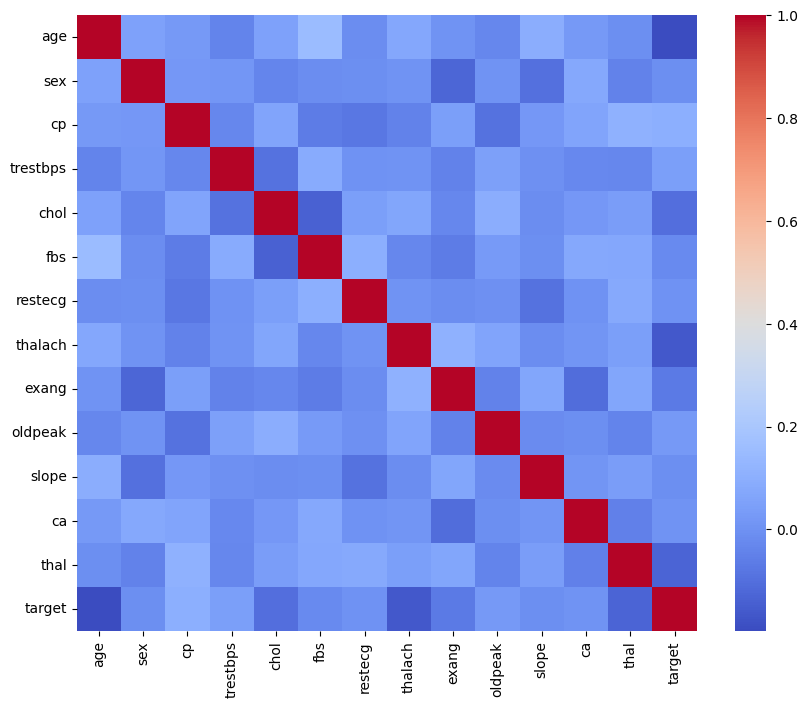

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [23]:
X = df.drop("target", axis=1)
y = df["target"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
numerical_cols = X.columns
categorical_cols = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC(kernel='rbf')
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results


{'Logistic Regression': 0.5409836065573771,
 'Random Forest': 0.5573770491803278,
 'SVM (RBF)': 0.5245901639344263}

In [27]:
best_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4918032786885246

Confusion Matrix:
 [[14 14]
 [17 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.47        28
           1       0.53      0.48      0.51        33

    accuracy                           0.49        61
   macro avg       0.49      0.49      0.49        61
weighted avg       0.50      0.49      0.49        61

